In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [9]:
dataset = pd.read_csv("activity_Admission_Predict_Ver1.1.csv")
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [16]:
dataset.loc[dataset['Chance of Admit '] > 0.8, 'Chance of Admit '] = 1
dataset.loc[dataset['Chance of Admit '] < 0.8, 'Chance of Admit '] = 0.0
column = dataset.loc[:, 'GRE Score':'Research'].columns.to_list()
x = dataset[column]
y = dataset['Chance of Admit '].astype('int')

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [19]:
logreg = LogisticRegression()

In [20]:
logreg.fit(x_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
y_pred = logreg.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0
 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [25]:
matrix = metrics.confusion_matrix(y_test, y_pred)
matrix

array([[82,  4],
       [ 9, 30]], dtype=int64)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        86
           1       0.88      0.77      0.82        39

    accuracy                           0.90       125
   macro avg       0.89      0.86      0.87       125
weighted avg       0.90      0.90      0.89       125



Text(0.5, 257.44, 'Predicted label')

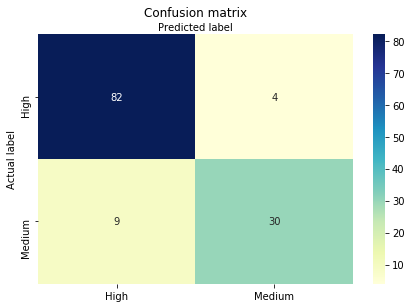

In [24]:
ax = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.set_xticklabels(['High', 'Medium', 'Low'])
ax.set_yticklabels(['High', 'Medium', 'Low'])
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')